 # Wrangling Data With DuckDB

In [1]:
import duckdb

In [ ]:
data = duckdb.sql("select * from 'bea_gdp_virginia_2018-current.csv'")

In [ ]:
data

In [ ]:
duckdb.sql("describe data")

In [ ]:
duckdb.sql("summarize data")

In [45]:
pd_df = data.to_df()

In [46]:
import pandas as pd

In [ ]:
pd_df.describe(include="all").transpose()

In [58]:
data.to_parquet('output.parquet')

In [2]:
duckdb.sql("INSTALL sqlite; LOAD sqlite;")



In [3]:
duckdb.sql("Create table if not exists benchmarks as select * from sqlite_scan('../benchmark_results.db','benchmark_results')")


In [4]:
duckdb.sql("SELECT * FROM benchmarks").to_df().describe(include="all").transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,2697.0,NaN,NaN,NaN,1395.32703,1.0,723.0,1397.0,2071.0,2745.0,781.464219
file_size,2697.0,NaN,NaN,NaN,9991899.888765,1000.0,10000.0,1000000.0,2000000.0,100000000.0,27035132.351936
file_size_mb,2697.0,NaN,NaN,NaN,420.283668,0.03821,0.391479,41.055923,83.172863,4296.348894,1152.455854
operation,2697,14,groupby,490,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tool,2697,3,pandas,1041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
execution_time,2697.0,NaN,NaN,NaN,3.347161,0.000212,0.00428,0.031748,0.290803,106.196522,13.146476
timestamp,2697,NaN,NaN,NaN,2025-04-18 03:03:40.803856128,2025-04-17 23:08:05,2025-04-18 01:51:57,2025-04-18 03:03:46,2025-04-18 03:52:25,2025-04-18 06:15:45,NaN


In [5]:

df = duckdb.sql(""" 
FROM benchmarks
SELECT 
tool
, file_size
, regexp_replace(operation, '\d+$', '') as operation      -- remove trailing integers
, execution_time


""").to_df()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


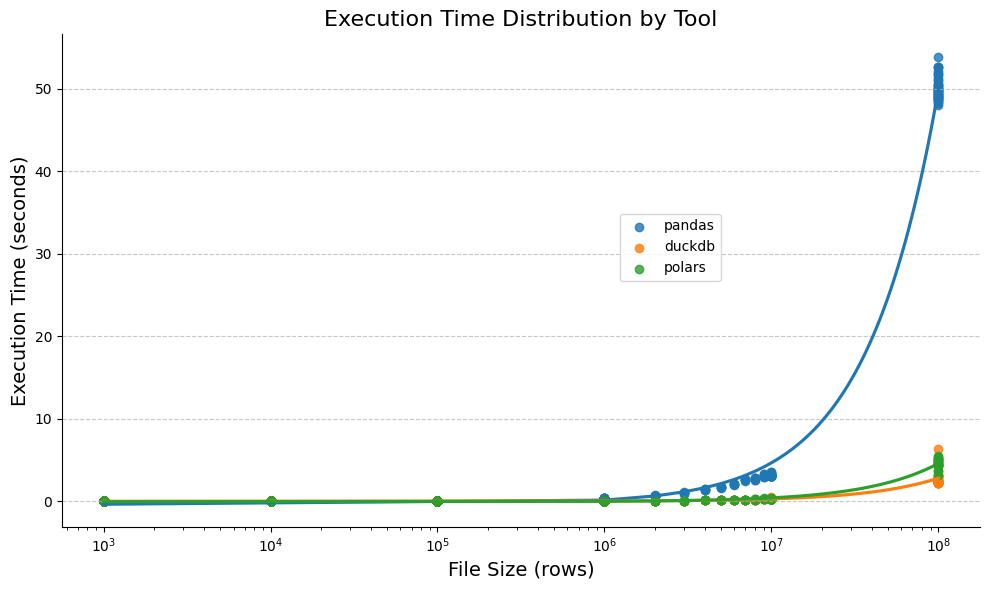

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the lmplot with legend positioned at the upper middle left
g = sns.lmplot(x='file_size', y='execution_time', data=df, hue='tool', 
               height=6, aspect=10/6,
               legend_out=False)  # Keep legend inside the plot

# Get the figure and axes from the FacetGrid
fig = g.fig
ax = g.axes[0, 0]  # The first (and only) subplot

# Set x-axis to log scale
ax.set_xscale('log')

# Add title and labels
ax.set_title('Execution Time Distribution by Tool', fontsize=16)
ax.set_xlabel('File Size (rows)', fontsize=14)
ax.set_ylabel('Execution Time (seconds)', fontsize=14)

# Add grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Update the legend position
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.6, .65))

# Improve aesthetics
sns.despine(left=False, bottom=False, ax=ax)
plt.tight_layout()

# Show the plot
plt.show()

In [17]:

source_data_url = "https://data.virginia.gov/dataset/3c786292-3dd5-4327-adad-79332a31683c/resource/59a6ed5f-11ec-49a2-b394-bbfd3e90fe72/download/eva_procurement_data_2025.csv"
target_file_path = "eVA_procurement_data_2025.parquet"
# 865 MB.

In [14]:
#%%

duckdb.sql("install httpfs; load httpfs;")

In [ ]:
duckdb.from_csv_auto(data_url).to_parquet(target_file_path)